Exercise 1

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pickle
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False})

In [2]:
#donwload lesson data
download_data('https://surfdrive.surf.nl/files/index.php/s/tEenLK693lU9v01')

In [4]:
X_nsep,y_nsep = make_blobs(n_samples=100,n_features =2,centers=[[-1,0],[1,0]],cluster_std=.8)

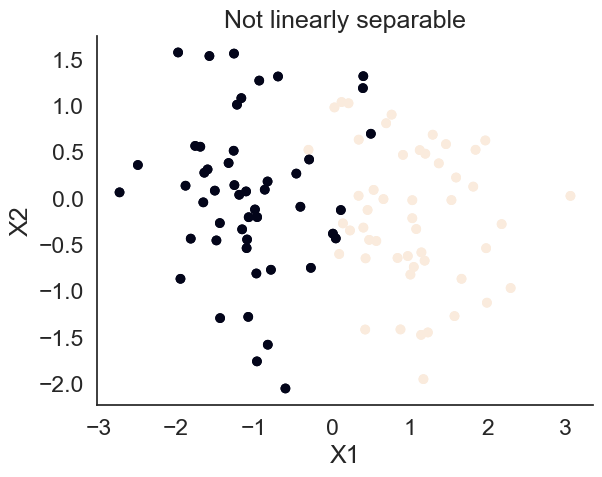

In [15]:
plt.scatter(X_nsep[:,0],X_nsep[:,1],c=y_nsep)
plt.title('Not linearly separable')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(X_nsep[:,0],X_nsep[:,1],c=y_nsep)


Best parameter (C): {'C': 0.1}
Best cross-validation score: 0.93


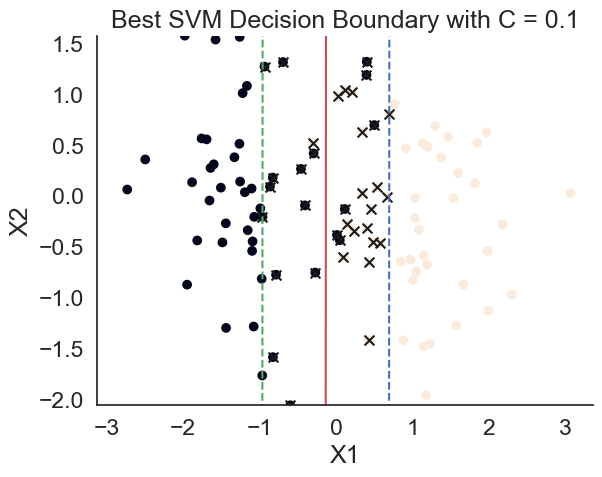

In [25]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for C
param_grid = {'C': [0.1, 1, 10, 100, 1000]}

# Create an SVM model with a linear kernel
svc = svm.SVC(kernel='linear')

# Use GridSearchCV to find the best value for C
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_nsep, y_nsep)

# Print the best parameter and the corresponding score
print("Best parameter (C):", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Plot the decision boundaries for the best value of C
best_svc = grid_search.best_estimator_

plt.scatter(X_nsep[:,0], X_nsep[:,1], c=y_nsep)

# Constructing the hyperplane using the best model
w = best_svc.coef_[0]
b = best_svc.intercept_[0]
x_points = np.linspace(-2, 2)
y_points = -(w[0] / w[1]) * x_points - b / w[1]

# Plot the red hyperplane
plt.plot(x_points, y_points, c='r')
# Encircle support vectors
plt.scatter(best_svc.support_vectors_[:, 0],
            best_svc.support_vectors_[:, 1],
            s=50,
            c='k',
            marker='x')
# Step 2 (unit-vector):
w_hat = best_svc.coef_[0] / (np.sqrt(np.sum(best_svc.coef_[0] ** 2)))
# Step 3 (margin):
margin = 1 / np.sqrt(np.sum(best_svc.coef_[0] ** 2))
# Step 4 (calculate points of the margin lines):
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin
# Plot margin lines
# Blue margin line above
plt.plot(points_of_line_above[:, 0],
         points_of_line_above[:, 1],
         'b--')
# Green margin line below
plt.plot(points_of_line_below[:, 0],
         points_of_line_below[:, 1],
         'g--')

plt.ylim([min(X_nsep[:,1]), max(X_nsep[:,1])])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title(f'Best SVM Decision Boundary with C = {grid_search.best_params_["C"]}')
plt.show()